<a href="https://colab.research.google.com/github/Sinis16/202220_Ejemplo_Parcial_Practico_1/blob/master/Talleres/Taller%201/MINE_4206_202510_AML_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Taller 1**

- **Integrante 1:**
- **Integrante 2:**

### **Problemática**:
El cambio climático, impulsado por la emisión de gases de efecto invernadero como el CO2, está provocando el calentamiento global y un aumento en los desastres ambientales. La contaminación del aire y la pérdida de biodiversidad son algunas de sus consecuencias, lo que hace necesario establecer políticas y planes de gestión de riesgos para mitigar sus efectos. Una de las estrategias clave es la movilidad sostenible, que busca reducir las emisiones de CO2 mediante alternativas como el uso de vehículos eléctricos y bicicletas. Estas medidas no solo contribuyen a disminuir la contaminación, sino que también mejoran la calidad del aire y la salud pública.

En este contexto, los sistemas de alquiler de bicicletas en ciudades han surgido como una solución efectiva para reducir la congestión vehicular y fomentar el transporte ecológico. Sin embargo, uno de sus principales retos es la distribución desequilibrada de bicicletas en las estaciones, lo que afecta su disponibilidad y la satisfacción de los usuarios. Para optimizar su funcionamiento, se requieren soluciones basadas en datos que permitan predecir la demanda en tiempo real, considerando factores como el clima, la hora del día, la ubicación, etc. Esto facilitaría una mejor gestión del sistema, asegurando que las bicicletas estén disponibles en los momentos y lugares adecuados.

### **Objetivos:**

- Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la demanda sobre el uso de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
- Determinar cuáles son los factores que más inciden en la demanda con base en los datos.


> Nota: Los datos y el diccionario de datos lo pueden encontrar en el [repositorio de github](https://github.com/fcastellanosp/MINE-4206_202510_AML/tree/main/Talleres/Taller%201). No olvidar que la semilla es '77'.

&nbsp;

### **Actividades a realizar:**
1. Exploración y perfilamiento de los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.

2.	Limpieza y preparación de los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.

3.	Construcción de un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: `[2, 3]`. Utiliza para la selección la métrica RMSE.

4.	Construcción de un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para `α: [1, 2, 3, 4, 5]`. Utiliza para la selección la métrica RMSE.

5.	Elaboración de una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE.

6.	Con base en el modelo Lasso determinar las variables más importantes para la predicción.

### **Análisis de resultados:**
Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

- ¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

- ¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.



> **NOTAS IMPORTANTES:**
> - El archivo se debe subir a BloqueNeon en el apartado de 'Actividades' y debe ser en formato .ipynb, ejecutado. **Celda que no esté ejecutada no será evaluada.**
> - El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de ML.
> - El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante.

# 0. Instalación e importación de librerias

In [156]:
!pip install ydata-profiling plotly -q # -q quiet

In [157]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

# Google Colab
from google.colab import files

# 1. Introducción a los datos

In [158]:
url = 'https://raw.githubusercontent.com/Sinis16/202220_Ejemplo_Parcial_Practico_1/refs/heads/master/Talleres/Taller%201/Datos_Bicicletas.csv'
data = pd.read_csv(url, sep=";")

Se revisa la carga correcta de los datos con la funcón head

In [159]:
data.head(20)

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
0   Winter        6       Clear   3.28   3.0014  0.81     0.0000   16   
1   Winter        6       Clear   2.34   1.9982  0.80     0.0000   40   
2   Winter        6       Clear   2.34   1.9982  0.80     0.0000   32   
3   Winter        6       Clear   3.28   3.0014  0.75     0.0000   13   
4   Winter        6       Clear   3.28   3.0014  0.75     0.0000    1   
5   Winter        6        Mist   3.28   1.0016  0.75     6.0032    1   
6   Winter        6       Clear   2.34   1.9982  0.80     0.0000    2   
7   Winter        6       Clear   1.40   1.0016  0.86     0.0000    3   
8   Winter        6       Clear   3.28   3.0014  0.75     0.0000    8   
9   Winter        6       Clear   7.04   7.0010  0.76     0.0000   14   
10  Winter        6       Clear   9.86   9.9974  0.76    16.9979   36   
11  Winter        6       Clear   8.92   5.9978  0.81    19.0012   56   
12  Winter        6       Clear  11.74  11.9972  0.77    19.0012   84   
13  Winter        6        Mist  13.62  13.9970  0.72    19.9995   94   
14  Winter        6        Mist  13.62  13.9970  0.72    19.0012  106   
15  Winter        6        Mist  12.68  13.0004  0.77    19.9995  110   
16  Winter        6        Mist  11.74  11.9972  0.82    19.9995   93   
17  Winter        6        Mist  12.68  13.0004  0.82    19.0012   67   
18  Winter        6  Light Rain  11.74  11.9972  0.88    16.9979   35   
19  Winter        6  Light Rain  11.74  11.9972  0.88    16.9979   37   

   time_of_day  
0        Night  
1        Night  
2        Night  
3        Night  
4        Night  
5      Morning  
6      Morning  
7      Morning  
8      Morning  
9      Morning  
10     Morning  
11     Morning  
12     Morning  
13     Evening  
14     Evening  
15     Evening  
16     Evening  
17     Evening  
18     Evening  
19     Evening

### 1.0.1 División de datos

In [160]:
train, test = train_test_split(data, test_size=0.2, random_state=19)
train.head()

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
6469     Fall        0  Light Rain   7.98   5.0012  0.87    19.0012    9   
2413   Spring        5       Clear  16.44  17.0000  0.55    12.9980  136   
14293  Summer        4       Clear  26.78  28.0022  0.48    15.0013  941   
10824  Spring        0        Mist   7.98   5.9978  0.81     8.9981   25   
9027   Winter        2        Mist   4.22  -0.9982  0.70    22.0028   12   

      time_of_day  
6469        Night  
2413      Morning  
14293     Evening  
10824       Night  
9027        Night

### 1.0.2 Reporte de datos

In [161]:
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se resalta la presencia de algunos datos duplicados, además de una alta correlación entre atemp, season y temp.

También se alerta respecto a la presencia de valores de 0 en weekday y windspeed pero son esperados.

Así mismo todos los datos tienen valores que tienen sentido y dentro del diccionario establecido. A excepción de los valores de weekday que en vez de ir del 1 al 7 van del 0 al 6.

### 1.0.3 Definición de Variables

In [162]:
#Variable objetivo
target_feature = 'cnt'

#Variables cstegoricas
cat_features = ["season", "weathersit", "time_of_day"]


### 1.0.4 Preprocesamiento

In [163]:
def preprocess(data):
  data = data.drop_duplicates() # Eliminamos duplicados
  X_data, y_variable = data.drop([target_feature], axis=1), data[target_feature]
  return X_data, y_variable

In [164]:
#Datos de entrenamiento
X_train, y_train = preprocess(train)
display(X_train)
display(y_train)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
6469     Fall        0  Light Rain   7.98   5.0012  0.87    19.0012   
2413   Spring        5       Clear  16.44  17.0000  0.55    12.9980   
14293  Summer        4       Clear  26.78  28.0022  0.48    15.0013   
10824  Spring        0        Mist   7.98   5.9978  0.81     8.9981   
9027   Winter        2        Mist   4.22  -0.9982  0.70    22.0028   
...       ...      ...         ...    ...      ...   ...        ...   
6452     Fall        6  Light Rain  10.80  11.0006  0.76    23.9994   
1043   Winter        3       Clear   1.40  -2.9980  0.47    12.9980   
1378   Winter        3       Clear  15.50  15.9968  0.23    19.0012   
17141  Winter        6       Clear   4.22  -2.0014  0.44    39.0007   
10862  Spring        1       Clear  15.50  15.9968  0.27    16.9979   

      time_of_day  
6469        Night  
2413      Morning  
14293     Evening  
10824       Night  
9027        Night  
...           ...  
6452      Morning  
1043      Morning  
1378      Evening  
17141       Night  
10862     Evening  

[13877 rows x 8 columns]

6469       9
2413     136
14293    941
10824     25
9027      12
        ... 
6452     121
1043       5
1378     268
17141     31
10862    618
Name: cnt, Length: 13877, dtype: int64

In [165]:
# Variables numericas
num_features = list(set(X_train.columns) - set(cat_features))
num_features

['weekday', 'windspeed', 'hum', 'atemp', 'temp']

In [166]:
#Datos de test
X_test, y_test = preprocess(test)
display(X_test)
display(y_test)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
6917     Fall        4        Mist  13.62  13.9970  0.51    22.0028   
11517  Spring        1       Clear  11.74  11.9972  0.71     8.9981   
13489  Summer        6  Light Rain  19.26  20.0030  0.88    16.9979   
7835     Fall        1       Clear  12.68  13.0004  0.88    15.0013   
5298   Summer        6        Mist  24.90  28.0022  0.74    19.0012   
...       ...      ...         ...    ...      ...   ...        ...   
16378    Fall        2        Mist   7.98   5.9978  0.66    12.9980   
1657   Winter        1       Clear   9.86   9.9974  0.37    11.0014   
12098  Spring        4       Clear  20.20  20.9996  0.83     7.0015   
15177    Fall        6       Clear  20.20  24.9992  0.40    16.9979   
9820   Winter        0        Mist   6.10   3.0014  0.36    15.0013   

      time_of_day  
6917        Night  
11517       Night  
13489     Morning  
7835        Night  
5298      Evening  
...           ...  
16378       Night  
1657      Evening  
12098     Morning  
15177     Evening  
9820        Night  

[3475 rows x 8 columns]

6917     241
11517      8
13489     15
7835       5
5298     281
        ... 
16378      6
1657     101
12098    415
15177    750
9820      15
Name: cnt, Length: 3475, dtype: int64

---
# 2. Modelamiento

## 2.0 Pipeline

No se realiza ninguna estandarización al ya todos los valores tener nombres comprensibles.

Así mismo no hay ninguna columna con un valor ausente, por lo que se considera solamente el encoding como función a realizar

In [167]:
cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

num_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ]
)



In [168]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", cat_transformer, make_column_selector(dtype_include=object))
    ]
)

In [169]:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bddfc9075d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bddfc507890>)]))])

In [170]:
pipe.fit_transform(X_train)

array([[ 0.    ,  7.98  ,  5.0012, ...,  0.    ,  0.    ,  1.    ],
       [ 5.    , 16.44  , 17.    , ...,  0.    ,  1.    ,  0.    ],
       [ 4.    , 26.78  , 28.0022, ...,  1.    ,  0.    ,  0.    ],
       ...,
       [ 3.    , 15.5   , 15.9968, ...,  1.    ,  0.    ,  0.    ],
       [ 6.    ,  4.22  , -2.0014, ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 15.5   , 15.9968, ...,  1.    ,  0.    ,  0.    ]])

In [171]:
num_column_names = pipe['column_transformer'].transformers_[1][1].get_feature_names_out()
cat_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
col_names = list(num_column_names) + list(cat_column_names)

col_names

['season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'weathersit_Clear',
 'weathersit_Heavy Rain',
 'weathersit_Light Rain',
 'weathersit_Mist',
 'time_of_day_Evening',
 'time_of_day_Morning',
 'time_of_day_Night',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [172]:
pd.DataFrame(pipe.fit_transform(X_train), columns=col_names)

season_Fall  season_Spring  season_Summer  season_Winter  \
0              0.0           7.98         5.0012           0.87   
1              5.0          16.44        17.0000           0.55   
2              4.0          26.78        28.0022           0.48   
3              0.0           7.98         5.9978           0.81   
4              2.0           4.22        -0.9982           0.70   
...            ...            ...            ...            ...   
13872          6.0          10.80        11.0006           0.76   
13873          3.0           1.40        -2.9980           0.47   
13874          3.0          15.50        15.9968           0.23   
13875          6.0           4.22        -2.0014           0.44   
13876          1.0          15.50        15.9968           0.27   

       weathersit_Clear  weathersit_Heavy Rain  weathersit_Light Rain  \
0               19.0012                    1.0                    0.0   
1               12.9980                    0.0                    1.0   
2               15.0013                    0.0                    0.0   
3                8.9981                    0.0                    1.0   
4               22.0028                    0.0                    0.0   
...                 ...                    ...                    ...   
13872           23.9994                    1.0                    0.0   
13873           12.9980                    0.0                    0.0   
13874           19.0012                    0.0                    0.0   
13875           39.0007                    0.0                    0.0   
13876           16.9979                    0.0                    1.0   

       weathersit_Mist  time_of_day_Evening  time_of_day_Morning  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  1.0   
2                  1.0                  0.0                  1.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  1.0                  0.0   
...                ...                  ...                  ...   
13872              0.0                  0.0                  0.0   
13873              0.0                  1.0                  1.0   
13874              0.0                  1.0                  1.0   
13875              0.0                  1.0                  1.0   
13876              0.0                  0.0                  1.0   

       time_of_day_Night  weekday  temp  atemp  hum  windspeed  
0                    0.0      1.0   0.0    0.0  0.0        1.0  
1                    0.0      0.0   0.0    0.0  1.0        0.0  
2                    0.0      0.0   0.0    1.0  0.0        0.0  
3                    0.0      0.0   1.0    0.0  0.0        1.0  
4                    0.0      0.0   1.0    0.0  0.0        1.0  
...                  ...      ...   ...    ...  ...        ...  
13872                0.0      1.0   0.0    0.0  1.0        0.0  
13873                0.0      0.0   0.0    0.0  1.0        0.0  
13874                0.0      0.0   0.0    1.0  0.0        0.0  
13875                0.0      0.0   0.0    0.0  0.0        1.0  
13876                0.0      0.0   0.0    1.0  0.0        0.0  

[13877 rows x 16 columns]

## 2.1 Regresión polinomial

### Mejor modelo

In [192]:
estimators_best = [
        ('transform', preprocessor),
        ('polinomial',PolynomialFeatures()),
        ('regression', LinearRegression())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0)]
              }

grid_search = GridSearchCV(pipe_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [193]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.3s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.3s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.3s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.2s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=StandardScaler(); total time=   0.3s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler(); total time=   0.2s
[CV] END polinomial__degree=2, transform__cat=OneHotEncoder(handle_unknown='ignore'), transform__num=MinMaxScaler

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, r

CPU times: user 1min 6s, sys: 3.26 s, total: 1min 9s
Wall time: 42.5 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bddfc9075d0>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_s...
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore'),
                                            OrdinalEncoder(handle_unknown='use_encoded_value',
                                                           unknown_value=0)],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [194]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.242808      0.016778         0.024821        0.004599   
1        0.230209      0.016448         0.019997        0.002539   
2        0.240019      0.016072         0.018124        0.001964   
3        0.021863      0.008972         0.000000        0.000000   
4        0.011186      0.001359         0.000000        0.000000   
5        0.007674      0.000478         0.000000        0.000000   
6        2.288397      0.482457         0.053245        0.027570   
7        2.354617      1.007652         0.038916        0.004529   
8        2.362230      0.995737         0.035979        0.002051   
9        0.016888      0.006169         0.000000        0.000000   
10       0.009810      0.000054         0.000000        0.000000   
11       0.008328      0.001032         0.000000        0.000000   

    param_polinomial__degree  \
0                          2   
1                          2   
2                          2   
3                          2   
4                          2   
5                          2   
6                          3   
7                          3   
8                          3   
9                          3   
10                         3   
11                         3   

                                 param_transform__cat param_transform__num  \
0              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
1              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
2              OneHotEncoder(handle_unknown='ignore')          passthrough   
3   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
4   OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler()   
5   OrdinalEncoder(handle_unknown='use_encoded_val...          passthrough   
6              OneHotEncoder(handle_unknown='ignore')     StandardScaler()   
7              OneHotEncoder(handle_unknown='ignore')       MinMaxScaler()   
8              OneHotEncoder(handle_unknown='ignore')          passthrough   
9   OrdinalEncoder(handle_unknown='use_encoded_val...     StandardScaler()   
10  OrdinalEncoder(handle_unknown='use_encoded_val...       MinMaxScaler()   
11  OrdinalEncoder(handle_unknown='use_encoded_val...          passthrough   

                                               params  split0_test_score  \
0   {'polinomial__degree': 2, 'transform__cat': On...        -130.393043   
1   {'polinomial__degree': 2, 'transform__cat': On...        -130.393043   
2   {'polinomial__degree': 2, 'transform__cat': On...        -130.393043   
3   {'polinomial__degree': 2, 'transform__cat': Or...                NaN   
4   {'polinomial__degree': 2, 'transform__cat': Or...                NaN   
5   {'polinomial__degree': 2, 'transform__cat': Or...                NaN   
6   {'polinomial__degree': 3, 'transform__cat': On...        -127.857075   
7   {'polinomial__degree': 3, 'transform__cat': On...        -127.857075   
8   {'polinomial__degree': 3, 'transform__cat': On...        -127.857075   
9   {'polinomial__degree': 3, 'transform__cat': Or...                NaN   
10  {'polinomial__degree': 3, 'transform__cat': Or...                NaN   
11  {'polinomial__degree': 3, 'transform__cat': Or...                NaN   

    split1_test_score  split2_test_score  split3_test_score  \
0         -133.180329        -133.745437        -129.921513   
1         -133.206495        -133.745437        -129.921513   
2         -133.184550        -133.745437        -129.921513   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   
5                 NaN                NaN                NaN   
6         -129.318617        -130.414337        -128.515368   
7         -129.312710        -130.414337        -128.515368   
8         -129.334514        -130.414337        -128.515368   
9                 NaN                NaN                NaN   
10   

In [195]:
grid_search.best_params_

{'polinomial__degree': 3,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': MinMaxScaler()}

### Evaluación final

In [197]:
coef_lr = dict(zip(col_names, best_model["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

season_Fall = -0.00
season_Spring = -35.14
season_Summer = -2,235.34
season_Winter = 2,586.73
weathersit_Clear = -216.78
weathersit_Heavy Rain = 401.45
weathersit_Light Rain = -24.50
weathersit_Mist = -87.91
time_of_day_Evening = 123.18
time_of_day_Morning = -10.77
time_of_day_Night = -9.94
weekday = 10.34
temp = 55.64
atemp = -56.05
hum = -33.68
windspeed = 13.99


In [196]:

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([ 45.40045369, 278.93201232, 453.79797617, ..., 250.67451634,
        37.65465776, 399.17033857])

In [198]:
n,p = X_train.shape

print('------------ Regresión Polinomial con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train, y_pred_train))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Polinomial con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Polinomial con entrenamiento------------
Residual sum of squares (MSE): 16187.32
R2-score: 0.51027
Adj R2-score: 0.50999
------------ Regresión Polinomial con evaluación ------------
Residual sum of squares (MSE): 16241.64
R2-score: 0.49724
Adj R2-score: 0.49608


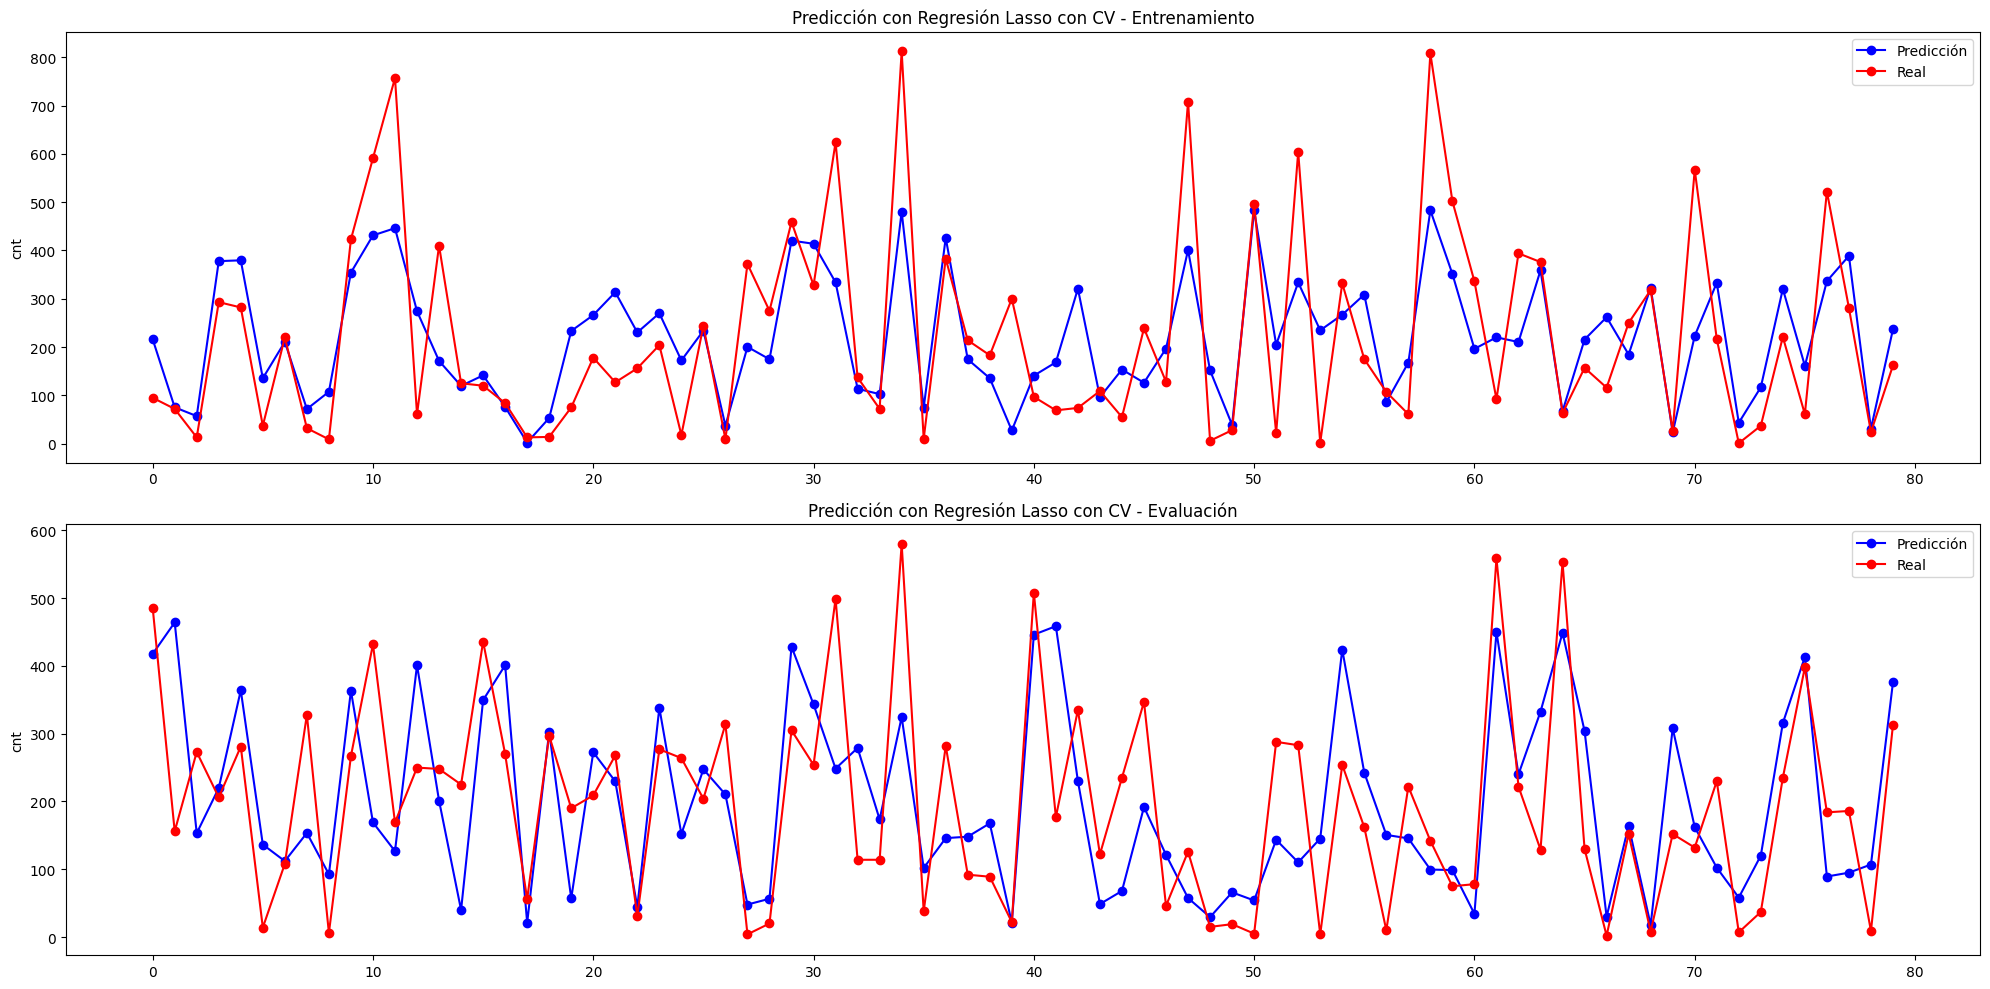

In [199]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))
a = 1000
b= 1080

xvals = list(range(b-a))
axs[0].plot(xvals, y_pred_train[a:b],'bo-', label='Predicción')
axs[0].plot(xvals, y_train[a:b],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[a:b],'bo-', label='Predicción')
axs[1].plot(xvals, y_test[a:b],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV - Entrenamiento', ylabel=y_train.name)
axs[0].legend()

axs[1].set(title='Predicción con Regresión Lasso con CV - Evaluación', ylabel=y_train.name)
axs[1].legend()

plt.tight_layout()
plt.show()